# 1. Define the Problem Statement, Import the required Libraries and perform Exploratory Data Analysis.

# Problem Statement
**From Yulu's Perspective:**

● Strategic Expansion: Yulu's decision to enter the Indian market is a strategic move to expand its global footprint. Understanding the demand factors in this new market is essential to tailor their services and strategies accordingly.

● Revenue Recovery: Yulu's recent revenue decline is a pressing concern. By analyzing the factors affecting demand for shared electric cycles in the Indian market, they can make informed adjustments to regain profitability.


**Column Profiling:**

- **datetime**: datetime
- **season** : season (1: spring, 2: summer, 3: fall, 4: winter)
- **holiday**: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: if day is neither weekend nor holiday is 1, otherwise is
**0.weather**:
  - 1: Clear, Few clouds, partly cloudy, partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp**: temperature in Celsius
- **atemp**: feeling temperature in Celsius
- **humidity**: humidity
- **windspeed**: wind speed
- **casual**: count of casual users
- **registered**: count of registered users
- **count**: count of total rental bikes including both casual and registered

# The company wants to know:
● Which variables are significant in predicting the demand for shared electric cycles in the
Indian market?
● How well those variables describe the electric cycle demands.

In [ ]:
# Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro

In [ ]:
# Read data from file
df=pd.read_csv("/content/sample_data/bike_sharing.csv")

Examine dataset structure, characteristics, and statistical summary

In [ ]:
# Inspect first few rows of dataset
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Inspect number of row and columns of dataframe
df.shape
# Number of rows = 10886
# Number of columns= 12

(10886, 12)

Identify and remove duplicate records

In [ ]:
# See if data is duplicated
df.duplicated().sum()

0

Identify missing values

In [ ]:
# Check number of missing values in dataframe
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Analyze the distribution of Numerical & Categorical variables

In [ ]:
# summary of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
# Convert datetime column data type = Object to data type = datetime64
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
# Extract Year, Month, Day of Week, Hour from date time column
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     10886 non-null  datetime64[ns]
 1   season       10886 non-null  int64         
 2   holiday      10886 non-null  int64         
 3   workingday   10886 non-null  int64         
 4   weather      10886 non-null  int64         
 5   temp         10886 non-null  float64       
 6   atemp        10886 non-null  float64       
 7   humidity     10886 non-null  int64         
 8   windspeed    10886 non-null  float64       
 9   casual       10886 non-null  int64         
 10  registered   10886 non-null  int64         
 11  count        10886 non-null  int64         
 12  year         10886 non-null  int32         
 13  month        10886 non-null  int32         
 14  day_of_week  10886 non-null  object        
 15  hour         10886 non-null  int32         
dtypes: d

Categorical variables

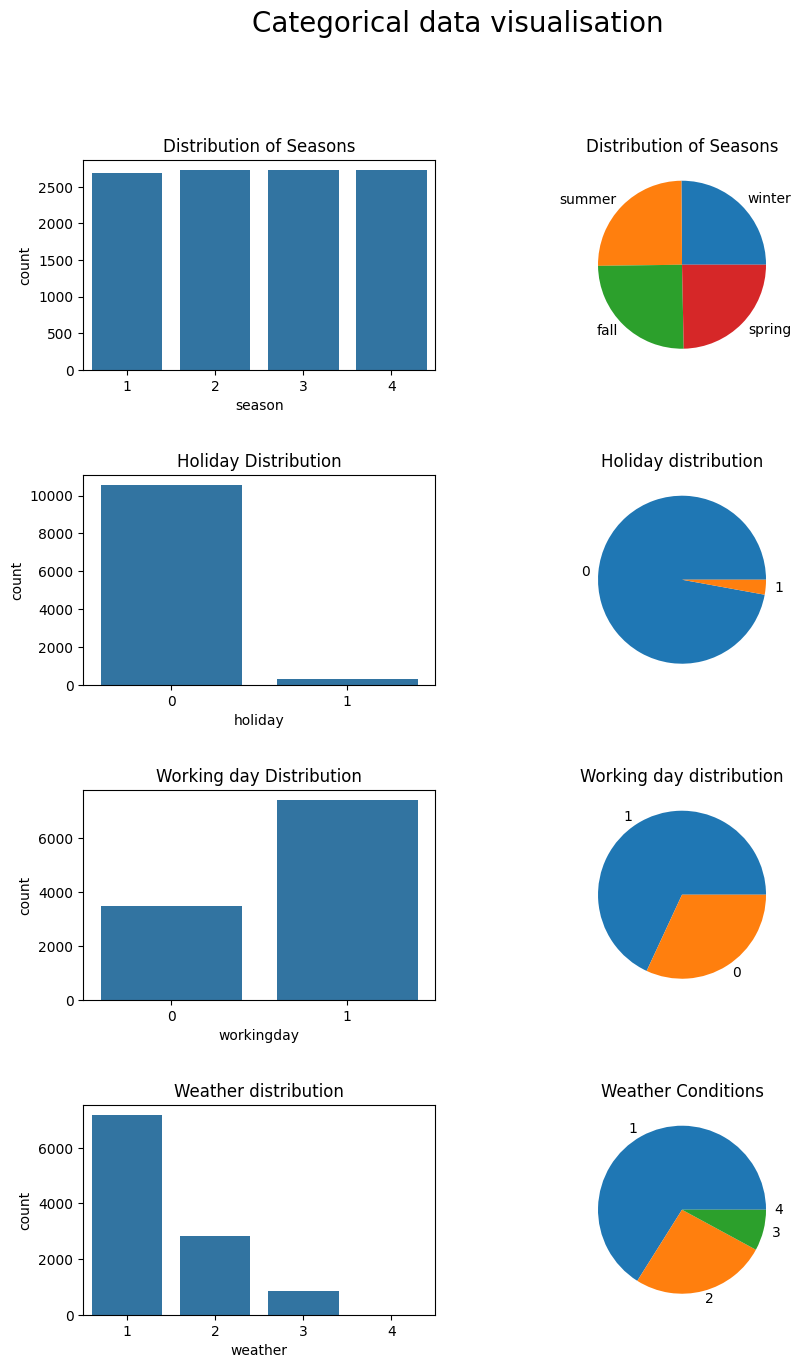

In [ ]:
# Categorical columns
# season,holiday,working day, weather,
plt.figure(figsize=(10,15)).suptitle("Categorical data visualisation",fontsize=20)
# .............................
#
# Count plot for Seasons data
plt.subplot(4,2,1)
sns.countplot(data=df,x="season")
plt.title('Distribution of Seasons')
# ......................................
#
# Pie Chart for Seasons
plt.subplot(4,2,2)
# Creating dictionary with key value pair
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
# The .map() function applies the season_mapping dictionary to each value in the season column. It replaces each numerical value with the corresponding season name.
df["season_name"]=df["season"].map(season_mapping)
# The .value_counts() method counts the frequency of each unique value in the season_name column.
season_counts = df['season_name'].value_counts()
plt.pie(season_counts,labels=season_counts.index)
plt.title('Distribution of Seasons')
# ..............................
#
# Count plot for Holidays
plt.subplot(4,2,3)
sns.countplot(data=df,x="holiday")
plt.title("Holiday Distribution")
# ------------------------------
#
# Pie plot for Holidays
plt.subplot(4,2,4)
holiday_counts=df["holiday"].value_counts()
plt.pie(holiday_counts, labels=holiday_counts.index)
plt.title("Holiday distribution")
# -------------------------------
#
# Count Plot for Working days
plt.subplot(4,2,5)
sns.countplot(data=df,x="workingday")
plt.title("Working day Distribution")
# ----------------------------------
#
# Pie plot for Working days
plt.subplot(4,2,6)
workingday_counts=df["workingday"].value_counts()
plt.pie(workingday_counts,labels=workingday_counts.index)
plt.title("Working day distribution")

# .....................................
#
#Count plot for Weather
plt.subplot(4,2,7)
sns.countplot(data=df,x=df["weather"])
plt.title("Weather distribution")
# ........................................
#
# Pie chart for Weather conditions
plt.subplot(4,2,8)
weather_count=df["weather"].value_counts()
plt.pie(weather_count,labels=weather_count.index)
plt.title("Weather Conditions")
# ..................
#
# add horizontal space between plots
plt.subplots_adjust(hspace=0.5)
plt.show()


Insights

  * Number of days in each seasons are equally distributed
  * Holidays are very less as compared to no holidays
  * Working days are more than double of non working days
  * Mostly the weather is Clear, Few clouds, partly cloudy, partly cloudy
  * Amost 40% waether is Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * Few days waether consition is Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  * None of the day weather condition was Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog



Numerical variables

In [ ]:
# Numerical columns
# temp,atemp,humidity,windspeed,casual,registered, count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     10886 non-null  datetime64[ns]
 1   season       10886 non-null  int64         
 2   holiday      10886 non-null  int64         
 3   workingday   10886 non-null  int64         
 4   weather      10886 non-null  int64         
 5   temp         10886 non-null  float64       
 6   atemp        10886 non-null  float64       
 7   humidity     10886 non-null  int64         
 8   windspeed    10886 non-null  float64       
 9   casual       10886 non-null  int64         
 10  registered   10886 non-null  int64         
 11  count        10886 non-null  int64         
 12  year         10886 non-null  int32         
 13  month        10886 non-null  int32         
 14  day_of_week  10886 non-null  object        
 15  hour         10886 non-null  int32         
 16  seas

Temperature distribution

Feeling temperature in Celsius distribution

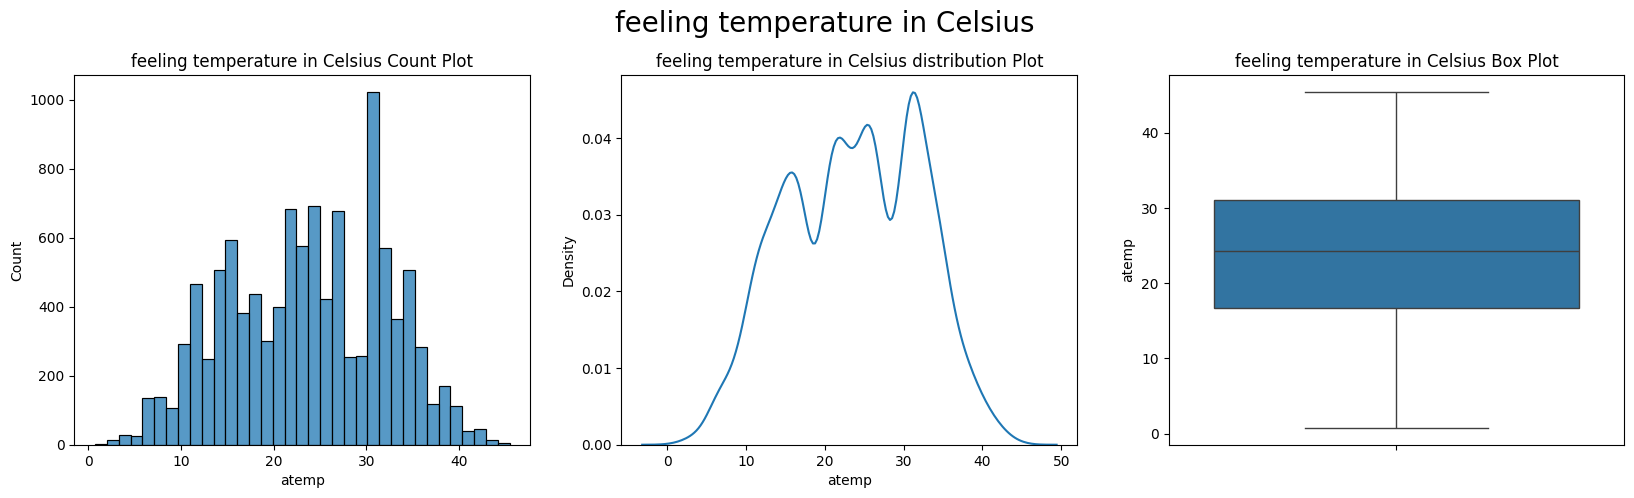

In [ ]:
plt.figure(figsize=(20,5)).suptitle("feeling temperature in Celsius",fontsize=20)
plt.subplot(1,3,1)
sns.histplot(data=df, x=df["atemp"])
plt.title("feeling temperature in Celsius Count Plot")
# .........................................
plt.subplot(1,3,2)
sns.kdeplot(data=df, x=df["atemp"])
plt.title("feeling temperature in Celsius distribution Plot")
# ........................................
plt.subplot(1,3,3)
sns.boxplot(data=df, y=df["atemp"])
plt.title("feeling temperature in Celsius Box Plot")
plt.subplots_adjust(top=0.85)
plt.show()

Insights-
  * Temperature varied between 2 degree celcius to 40 degree celcius,
  * On average temperature was between 15 to 32 degree


Wind speed distribution

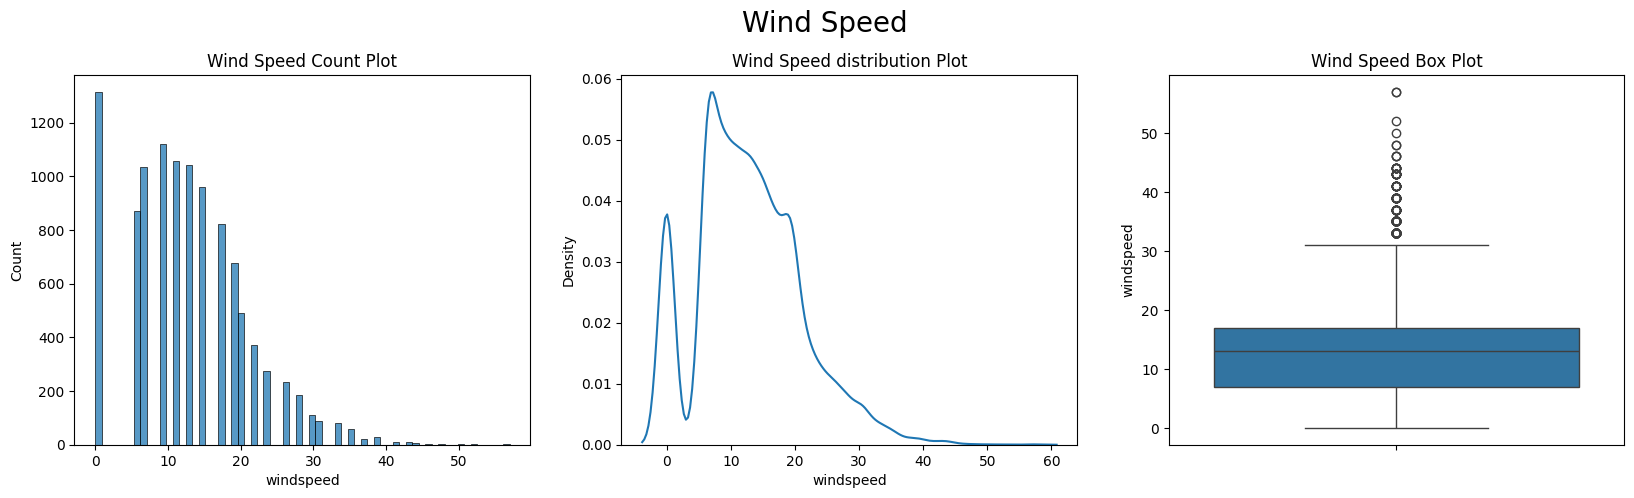

In [ ]:
plt.figure(figsize=(20,5)).suptitle("Wind Speed",fontsize=20)
plt.subplot(1,3,1)
sns.histplot(data=df, x=df["windspeed"])
plt.title("Wind Speed Count Plot")
# .........................................
plt.subplot(1,3,2)
sns.kdeplot(data=df, x=df["windspeed"])
plt.title("Wind Speed distribution Plot")
# ........................................
plt.subplot(1,3,3)
sns.boxplot(data=df, y=df["windspeed"])
plt.title("Wind Speed Box Plot")
plt.subplots_adjust(top=0.85)
plt.show()

Casual users distribution

Insights
* On average Wind speed was between 9 to 19
* Some days wind speed was extremely high

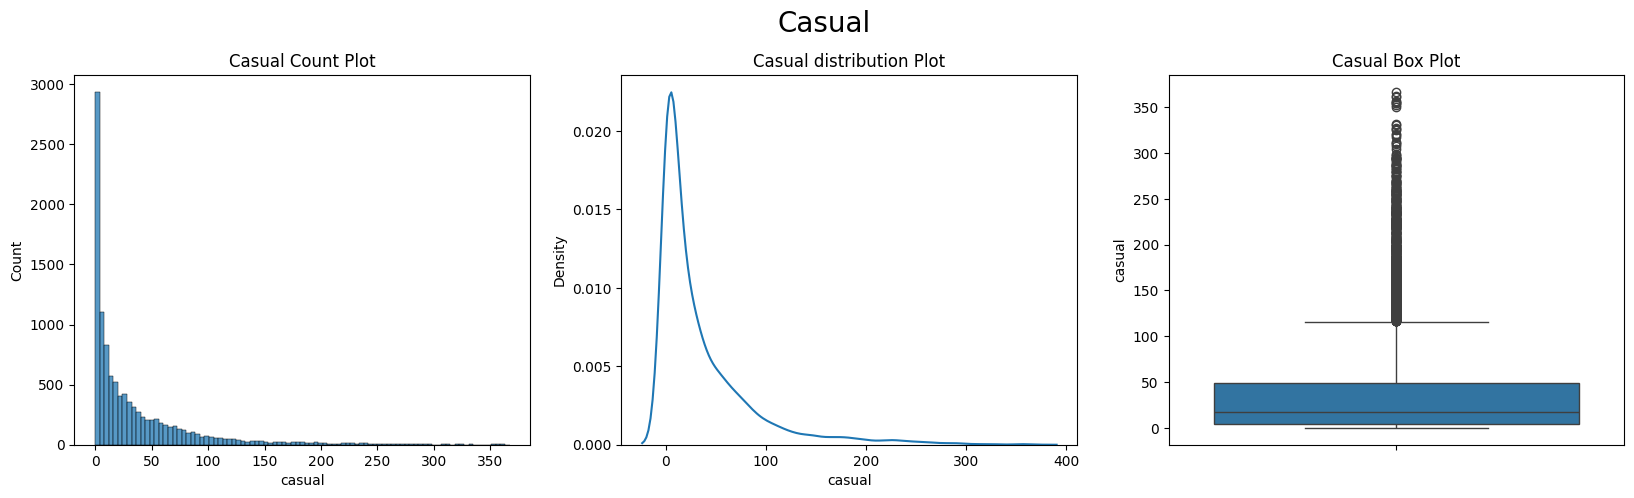

In [ ]:
plt.figure(figsize=(20,5)).suptitle("Casual",fontsize=20)
plt.subplot(1,3,1)
sns.histplot(data=df, x=df["casual"])
plt.title("Casual Count Plot")
# .........................................
plt.subplot(1,3,2)
sns.kdeplot(data=df, x=df["casual"])
plt.title("Casual distribution Plot")
# ........................................
plt.subplot(1,3,3)
sns.boxplot(data=df, y=df["casual"])
plt.title("Casual Box Plot")
plt.subplots_adjust(top=0.85)
plt.show()

Insights

* On average casual users number of bookings are between 1 to 50, however some casual users have booking even greater than 120 upto 375

Registered users distribution

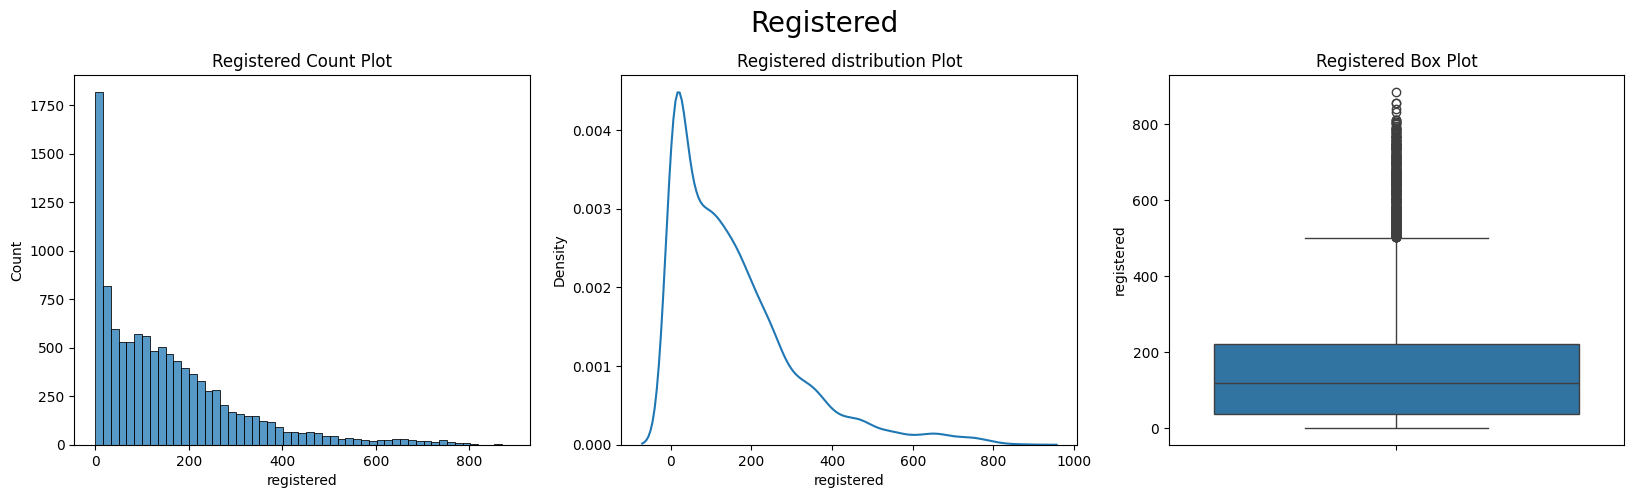

In [ ]:
plt.figure(figsize=(20,5)).suptitle("Registered",fontsize=20)
plt.subplot(1,3,1)
sns.histplot(data=df, x=df["registered"])
plt.title("Registered Count Plot")
# .........................................
plt.subplot(1,3,2)
sns.kdeplot(data=df, x=df["registered"])
plt.title("Registered distribution Plot")
# ........................................
plt.subplot(1,3,3)
sns.boxplot(data=df, y=df["registered"])
plt.title("Registered Box Plot")
plt.subplots_adjust(top=0.85)
plt.show()

Insights
* Registered users average booking numbers ranges between approximately 5 to 225, There are registered users which have bookings more than 400 upto 850 bookings

Total rental bikes distribution

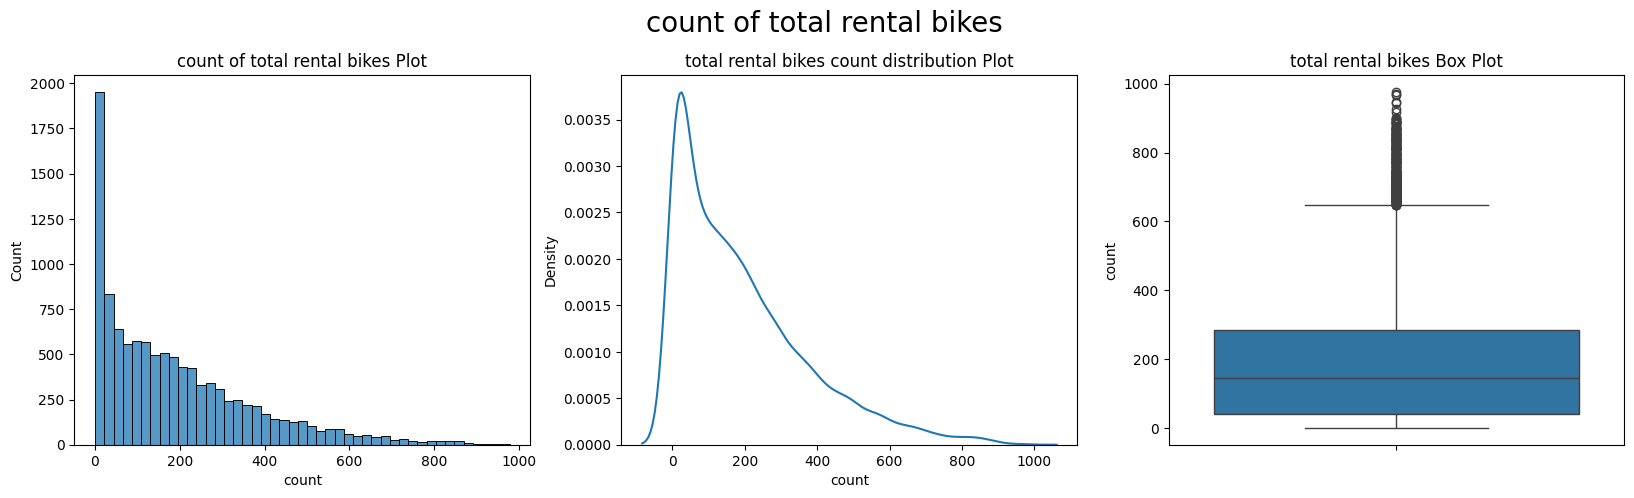

In [ ]:
plt.figure(figsize=(20,5)).suptitle("count of total rental bikes",fontsize=20)
plt.subplot(1,3,1)
sns.histplot(data=df, x=df["count"])
plt.title("count of total rental bikes Plot")
# .........................................
plt.subplot(1,3,2)
sns.kdeplot(data=df, x=df["count"])
plt.title("total rental bikes count distribution Plot")
# ........................................
plt.subplot(1,3,3)
sns.boxplot(data=df, y=df["count"])
plt.title("total rental bikes Box Plot")
plt.subplots_adjust(top=0.85)
plt.show()

Total Rental bikes ranges from 0 to 1000
The distribution is left tailed

#Insights

* There are total 10886 rows and, 12 columns
* The data does not contain any nulls, thus no need of handling the missing data.
* Data does not contain any duplicate values
* None of the numerical columns are normally distributed
* There are no outliers in temperature and feeling temperature columns
* There are outliers in other columns (casual,registered, total) but they should not be removed as outliers important for studying the demand for shared electric cycles



# 2. Relationship between the Dependent and Independent Variables#

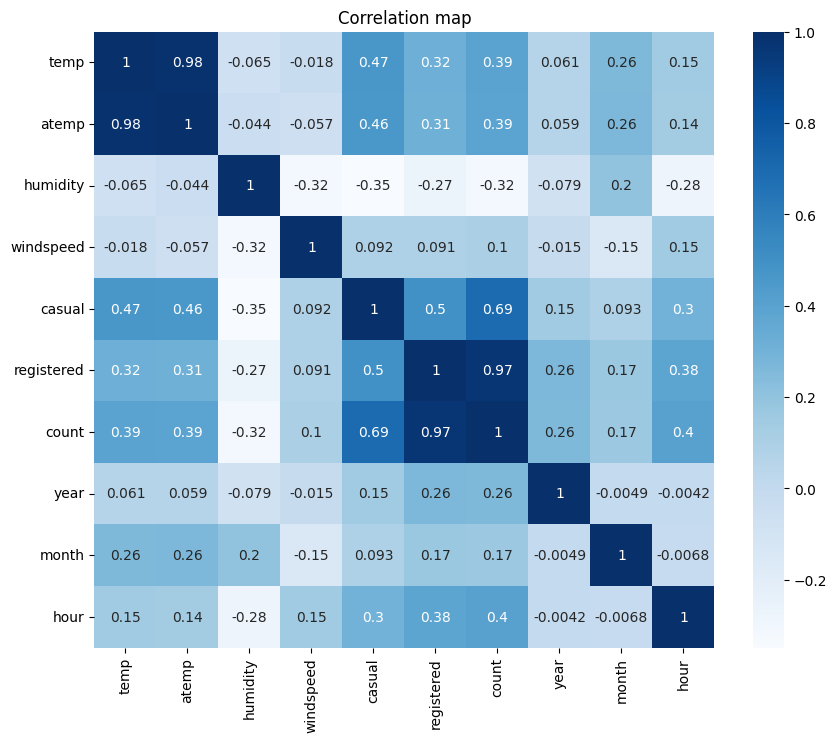

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df[["temp","atemp","humidity","windspeed","casual","registered","count","year","month","hour"]].corr(),cmap="Blues",annot=True)
plt.title("Correlation map")
plt.show()

# Insights

**Count (Total Bike Rentals):**

* Total rental bikes have highest positive correlation (0.97) with registered users followed by casual users (0.69), atemp and temp are equally corelated with total rental bikes(0.39)
* Negative correlation with 'humidity' (-0.32).

# 3. Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?

In [ ]:
# Number of Working day and not working days
df["workingday"].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [ ]:
df[(df["workingday"]==1)]["count"].sum()

1430604

In [ ]:
df[(df["workingday"]==0)]["count"].sum()

654872

<Axes: xlabel='day_of_week', ylabel='count'>

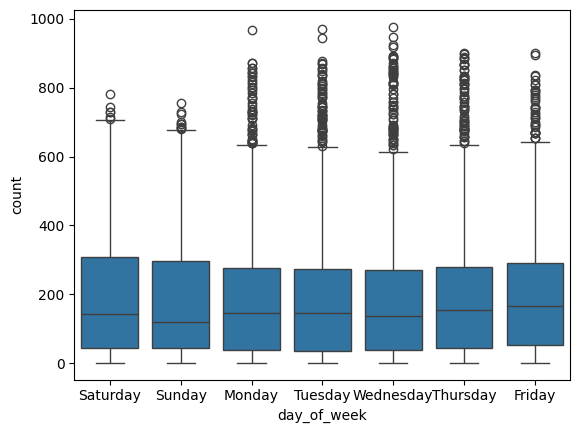

In [ ]:
sns.boxplot(x="day_of_week",y="count",data=df)

<Axes: xlabel='workingday', ylabel='count'>

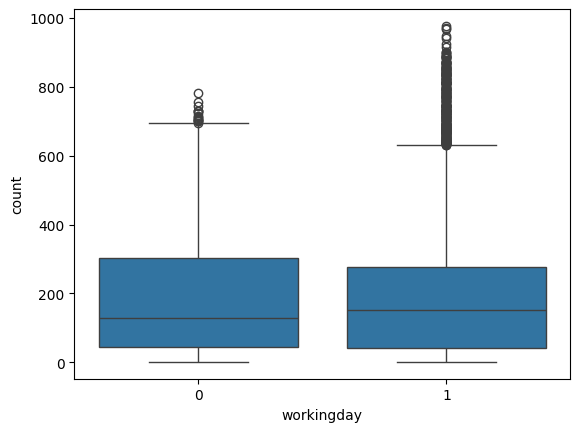

In [ ]:
sns.boxplot(x="workingday",y="count",data=df)

Null Hypothesis (H0) and Alternate Hypothesis (H1)

In [ ]:
# As it can be seen median is slightly higher on weekdays than weekend it needs to be varified statistically
# Ho: no of bike rides on weekdays less than or equal to number of rides on weekends
# Ha: no of bike rides on weekdays GREATER than rides on weekends
# ..................................................................................................
# As population mean is not given, comparison between numerical and categorical, appropriate test will be- Sample Independent T-test

In [ ]:
# significance level
alpha= 0.05

In [ ]:
df["workingday"].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [ ]:
# Collect and prepare data
weekday=df[df["workingday"]==1]['count'].sample(3474)
weekend=df[df["workingday"]==0]['count'].sample(3474)

In [ ]:
round(weekday.std(),2),round(weekend.std(),2)

(185.37, 173.72)

In [ ]:
round(weekday.std(),2),round(weekend.std(),2)

(185.37, 173.72)

In [ ]:
# Calculate p-value
from scipy.stats import ttest_ind
test_stat,p_value=ttest_ind(weekday,weekend,equal_var=False,alternative="greater")
test_stat,p_value

(1.7894898249755986, 0.03678984935746712)

In [ ]:
if p_value<alpha:
  print("Reject Null Hypothesis. Therefore, no of bike rides on weekdays are GREATER than rides on weekends")
else:
  print("Fail to Reject Null Hypothesis. Therefore, no of bike rides on weekdays are less than or equal to number of rides on weekends")

Reject Null Hypothesis. Therefore, no of bike rides on weekdays are GREATER than rides on weekends


# Insights
* Statistically  no of bike rides on weekdays are GREATER than rides on weekends

# 4. Check if the demand of bicycles on rent is the same for different Weather conditions?

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day_of_week,hour,season_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,Saturday,0,spring
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,Saturday,1,spring
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,Saturday,2,spring
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,Saturday,3,spring
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,Saturday,4,spring


In [ ]:
df["weather"].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [ ]:
df=df[~(df["weather"]==4)]

In [ ]:
df["weather"].value_counts()

weather
1    7192
2    2834
3     859
Name: count, dtype: int64

In [ ]:
w1=df[df["weather"]==1]["count"].sample(859)
w2=df[df["weather"]==2]["count"].sample(859)
w3=df[df["weather"]==3]["count"].sample(859)

<Axes: xlabel='weather', ylabel='count'>

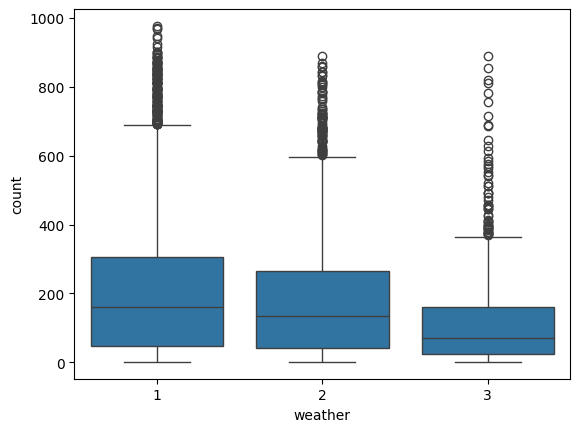

In [ ]:
sns.boxplot(x="weather",y="count",data=df)

In [ ]:
# Ho: Demand of bicycles on rent is the same for different Weather conditions
# Ha:Demand of bicycles is different for different weather conditions

In [ ]:
# as there are more than two samples, anova test should be performed
# Assumptions of ANNOVA - Normality, Equal variance, Independence
  # Normality Test, Visualisation- QQ plot, kde plot, distplot
  #                 Statistical- Shapiro Wilk,
  # Variance - Statistically - Levenes test
  #

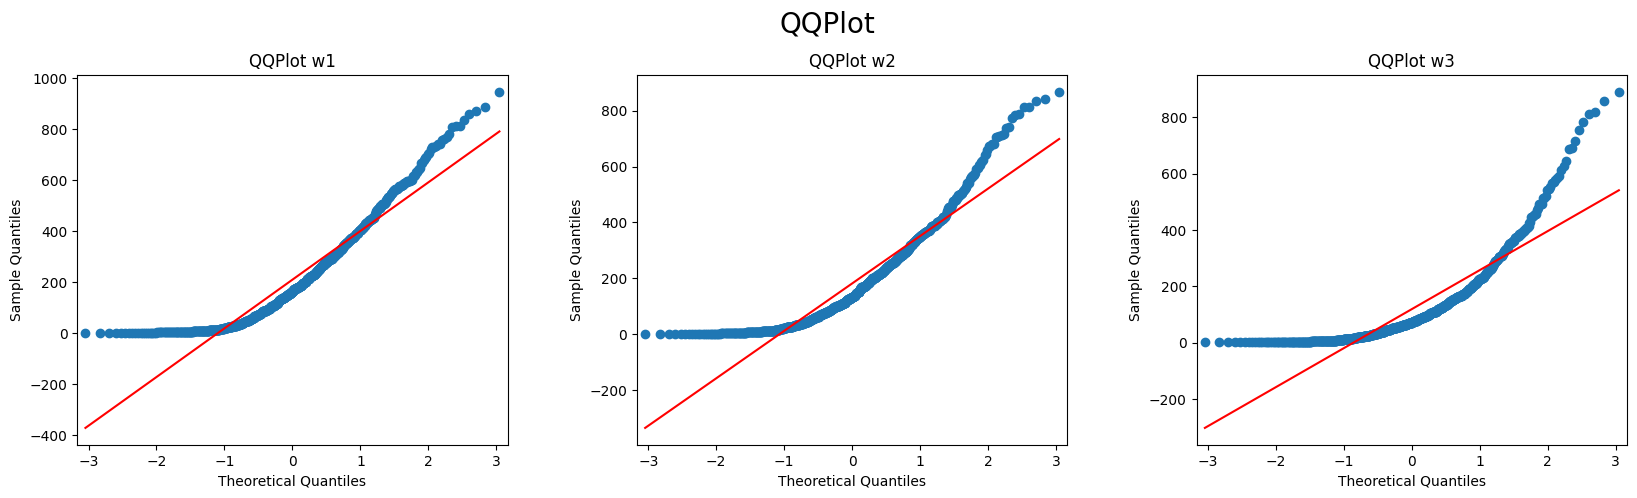

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("QQPlot", fontsize=20)

# Plot QQ plots in each subplot
sm.qqplot(w1, line="s", ax=axs[0])
axs[0].set_title("QQPlot w1")

sm.qqplot(w2, line="s", ax=axs[1])
axs[1].set_title("QQPlot w2")

sm.qqplot(w3, line="s", ax=axs[2])
axs[2].set_title("QQPlot w3")

# Adjust layout to prevent overlap
fig.subplots_adjust(top=0.85, wspace=0.3)

plt.show()

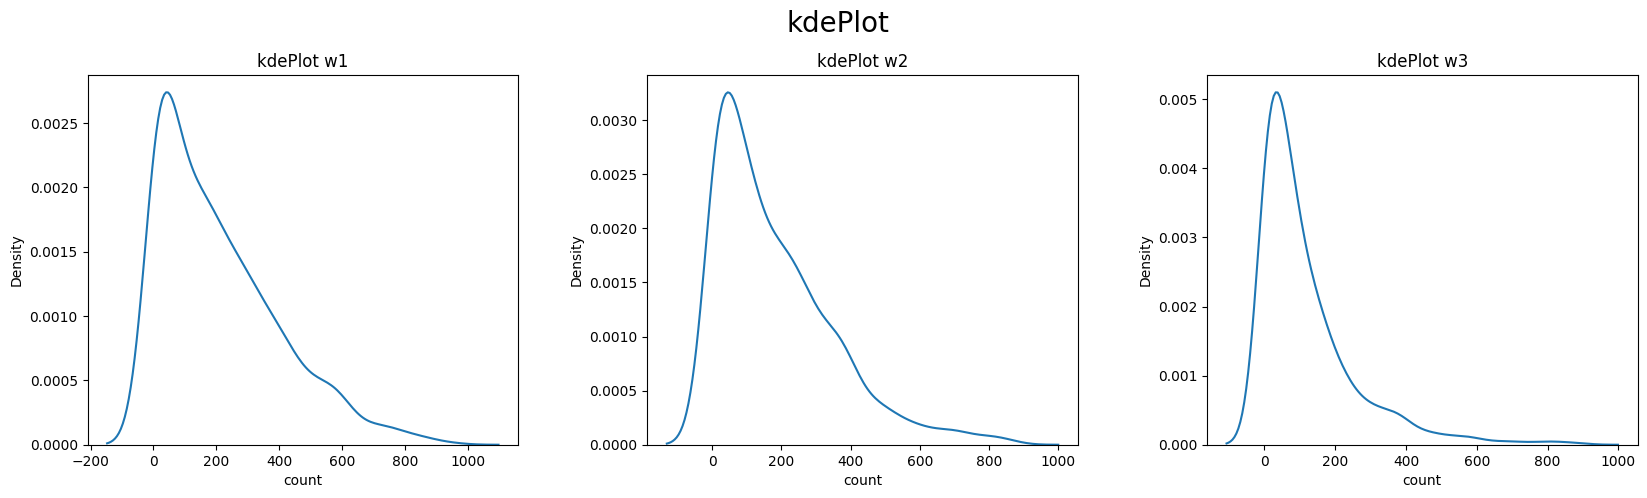

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("kdePlot", fontsize=20)

# Plot kde plots in each subplot
sns.kdeplot(w1, ax=axs[0])
axs[0].set_title("kdePlot w1")

sns.kdeplot(w2,ax=axs[1])
axs[1].set_title("kdePlot w2")

sns.kdeplot(w3,ax=axs[2])
axs[2].set_title("kdePlot w3")

# Adjust layout to prevent overlap
fig.subplots_adjust(top=0.85, wspace=0.3)

plt.show()

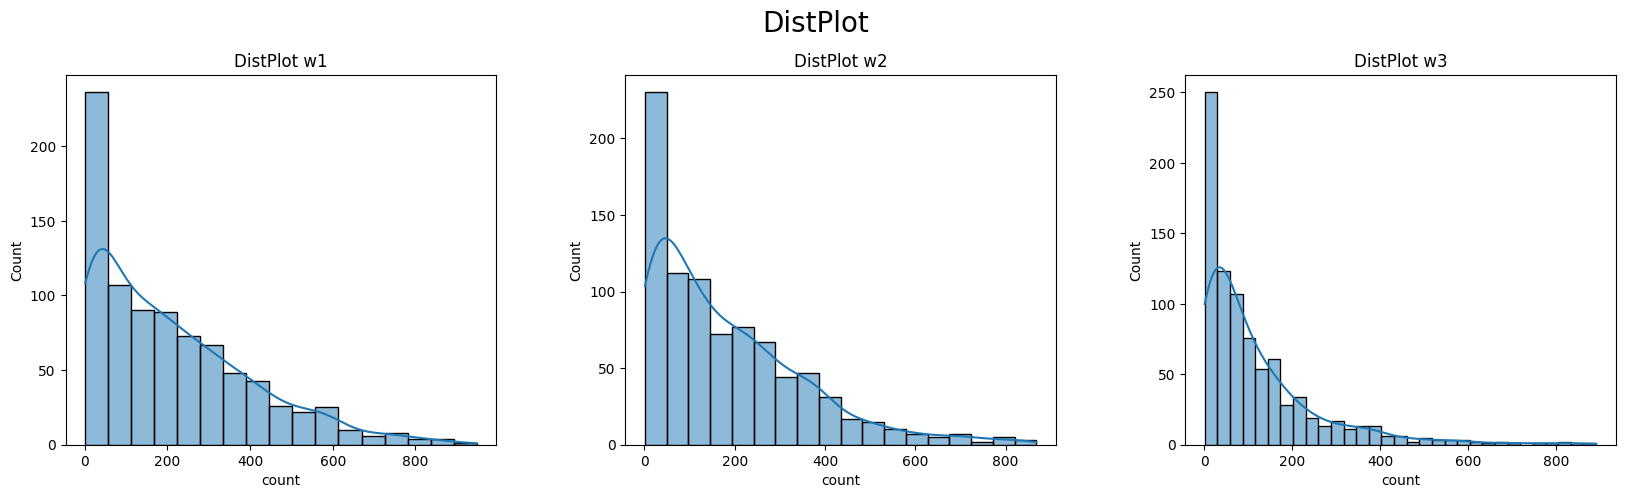

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("DistPlot", fontsize=20)

# Plot dist plots in each subplot
sns.histplot(w1,kde=True, ax=axs[0])
axs[0].set_title("DistPlot w1")

sns.histplot(w2,kde=True,ax=axs[1])
axs[1].set_title("DistPlot w2")

sns.histplot(w3,kde=True,ax=axs[2])
axs[2].set_title("DistPlot w3")

# Adjust layout to prevent overlap
fig.subplots_adjust(top=0.85, wspace=0.3)

plt.show()

In [ ]:
test_stat,p_value=shapiro(w1)
test_stat,p_value
if p_value<alpha:
  print("Reject null hypothesis, Data is not normally distributed")
else:
  print("Fail to reject null hypothesis, Data is normally distributed")

Reject null hypothesis, Data is not normally distributed


In [ ]:
test_stat,p_value=shapiro(w2)
test_stat,p_value
if p_value<alpha:
  print("Reject null hypothesis, Data is not normally distributed")
else:
  print("Fail to reject null hypothesis, Data is normally distributed")

Reject null hypothesis, Data is not normally distributed


In [ ]:
test_stat,p_value=shapiro(w3)
test_stat,p_value
if p_value<alpha:
  print("Reject null hypothesis, Data is not normally distributed")
else:
  print("Fail to reject null hypothesis, Data is normally distributed")

Reject null hypothesis, Data is not normally distributed


In [ ]:
# variance test
from scipy.stats import levene
statistics,p_value=levene(w1,w2,w3)
if p_value<alpha:
  print("Data do not have equal variance")
else:
  print("Data have equal variance")

Data do not have equal variance


In [ ]:
w1.var(),w2.var(),w3.var()

(36510.72848843047, 28774.79392202675, 19204.775892714195)

In [ ]:
# Non-Parametric test
# Kruskal Wallis Test
from scipy.stats import kruskal
stat,p_value=kruskal(w1,w2,w3)
if p_value<alpha:
  print("There is a significant difference for demand of bicycles in different weather condition")
else:
  print("There is no significant difference in demand for bicycles in different weather condition")

There is a significant difference for demand of bicycles in different weather condition


#Insights

* Weather data is not normally distributed
* Weather data do not have equal variance
* There is a significant difference for demand of bicycles in different weather condition

# 5. Check if the demand of bicycles on rent is the same for different Seasons? -->

In [ ]:
# Check seasons data set
df["season_name"].value_counts()

season_name
winter    2734
summer    2733
fall      2733
spring    2685
Name: count, dtype: int64

<Axes: xlabel='season_name', ylabel='count'>

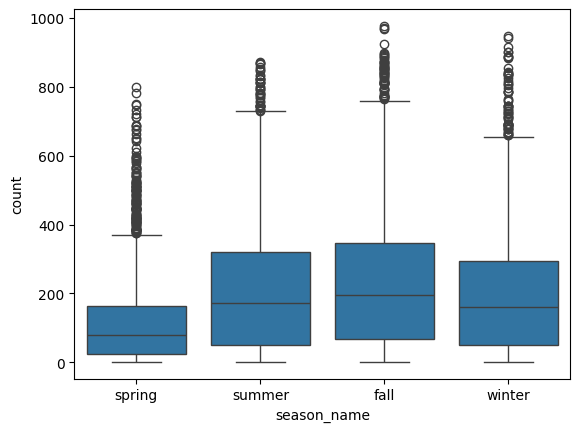

In [ ]:
# As season_name is independent categorical column(more than two categories) and count is a dpendent numerical column- One_way ANOVA test
sns.boxplot(x="season_name",y="count", data=df)

In [ ]:
s1=df[df["season_name"]=="winter"]["count"].sample(2685)
s2=df[df["season_name"]=="summer"]["count"].sample(2685)
s3=df[df["season_name"]=="fall"]["count"].sample(2685)
s4=df[df["season_name"]=="spring"]["count"].sample(2685)

## Assumptions of One-way ANOVA
  1. Data should be nomally distributed
  2. Data should be independent across each record
  3. Equal variance in different groups



  Check for Normality
  
  1. QQPLOT

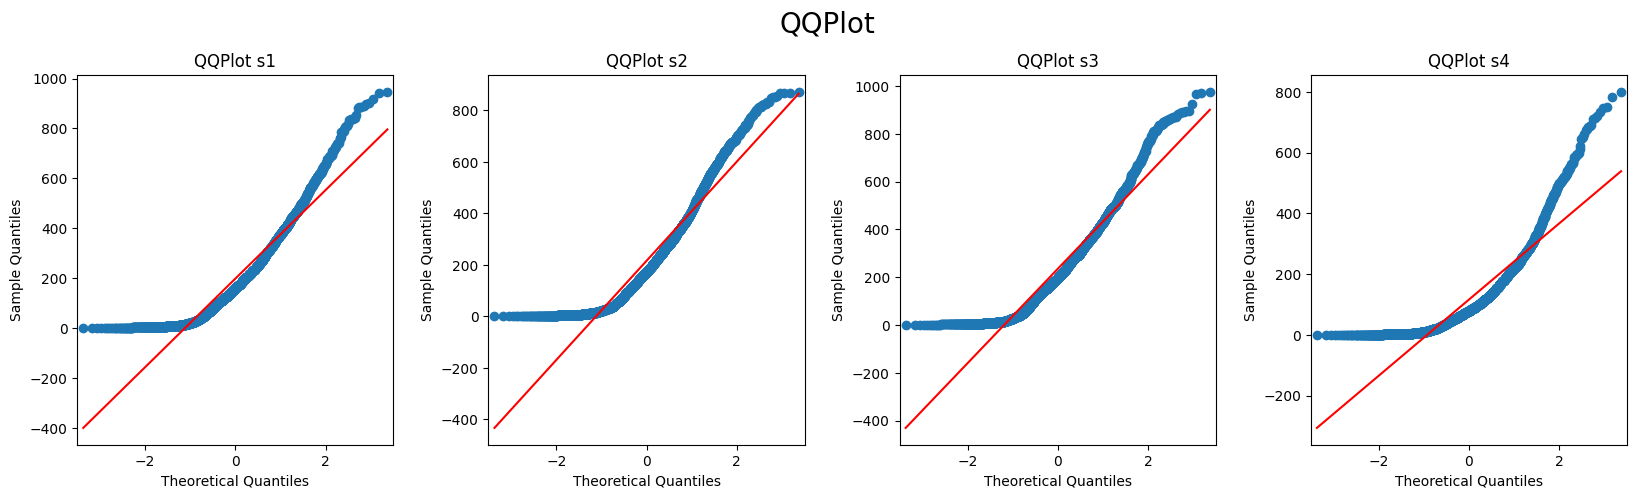

In [ ]:
fig,axs=plt.subplots(1,4,figsize=(20,5))
fig.suptitle("QQPlot",fontsize=20)
sm.qqplot(s1,line="s",ax=axs[0])
axs[0].set_title("QQPlot s1")

sm.qqplot(s2,line="s",ax=axs[1])
axs[1].set_title("QQPlot s2")

sm.qqplot(s3, line="s",ax=axs[2])
axs[2].set_title("QQPlot s3")

sm.qqplot(s4, line="s",ax=axs[3])
axs[3].set_title("QQPlot s4")
fig.subplots_adjust(top=0.85,wspace=0.3)
plt.show()

In [ ]:
# Data is not normaly distributed

  Check for Normality
    
  2. kde Plot

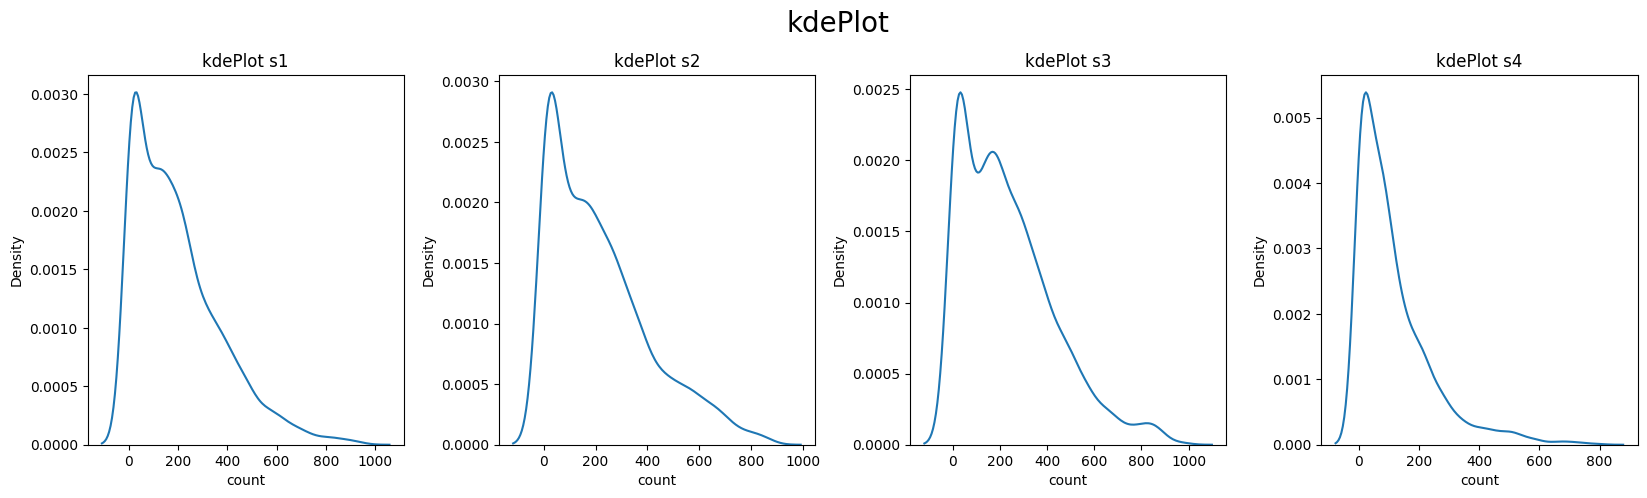

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle("kdePlot", fontsize=20)

# Plot kde plots in each subplot
sns.kdeplot(s1, ax=axs[0])
axs[0].set_title("kdePlot s1")

sns.kdeplot(s2,ax=axs[1])
axs[1].set_title("kdePlot s2")

sns.kdeplot(s3,ax=axs[2])
axs[2].set_title("kdePlot s3")

sns.kdeplot(s4,ax=axs[3])
axs[3].set_title("kdePlot s4")
# Adjust layout to prevent overlap
fig.subplots_adjust(top=0.85, wspace=0.3)

plt.show()

  Check for Normality
  
  2. Dist Plot

Text(0.5, 1.0, 'Hist Plot s4')

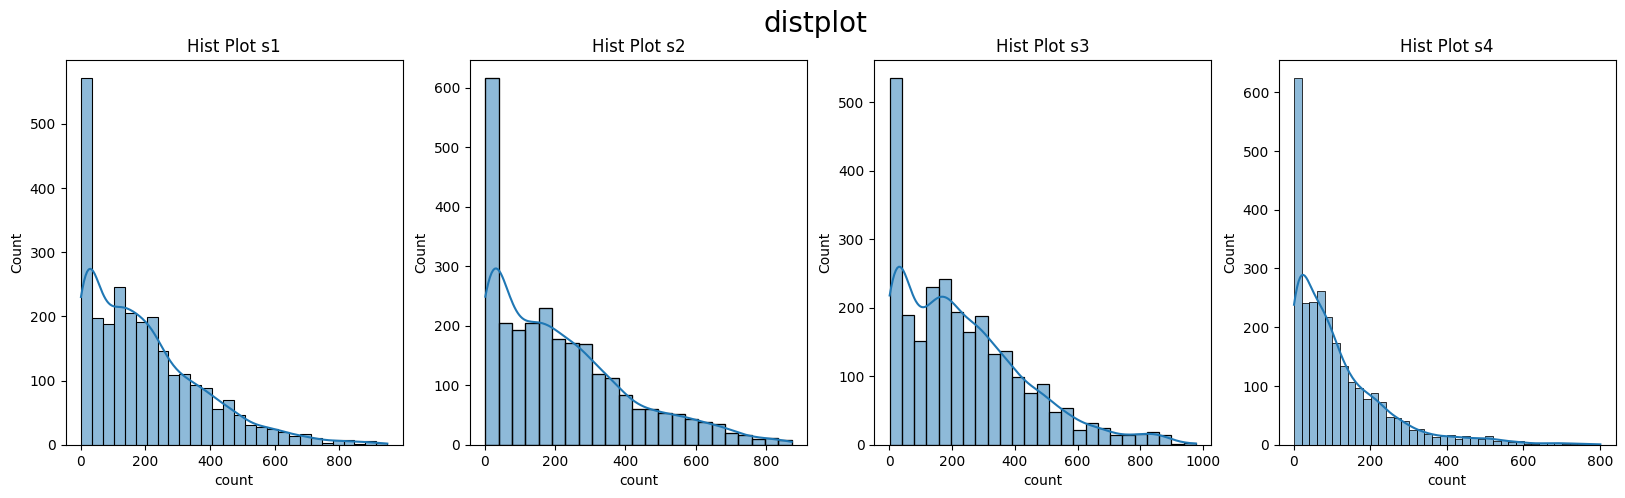

In [ ]:
fig,axs = plt.subplots(1,4, figsize=(20,5))
fig.suptitle("distplot",fontsize=20)

# Plot dist plots in each subplots
sns.histplot(s1,kde=True, ax=axs[0])
axs[0].set_title("Hist Plot s1")

sns.histplot(s2,kde=True,ax=axs[1])
axs[1].set_title("Hist Plot s2")

sns.histplot(s3,kde=True,ax=axs[2])
axs[2].set_title("Hist Plot s3")

sns.histplot(s4,kde=True,ax=axs[3])
axs[3].set_title("Hist Plot s4")

  Check for Normality

 3. Statistical test- Shapiro-Wilk Test

In [ ]:
# statistical test
stats,p_value=shapiro(s1)
if p_value<alpha:
  print("Reject null hypothesis, Data is not normally distributed")
else:
  print("Fail to reject null hypothesis, Data is normally distributed")

Reject null hypothesis, Data is not normally distributed


In [ ]:
stats,p_value=shapiro(s2)
if p_value<alpha:
  print("Reject null hypothesis, Data is not normally distributed")
else:
  print("Fail to reject null hypothesis, Data is normally distributed")

Reject null hypothesis, Data is not normally distributed


In [ ]:
stats,p_value=shapiro(s3)
if p_value<alpha:
  print("Reject null hypothesis, Data is not normally distributed")
else:
  print("Fail to reject null hypothesis, Data is normally distributed")

Reject null hypothesis, Data is not normally distributed


Check for Normality

Levene Test

In [ ]:
# Check for variance
stats,p_value=levene(s1,s2,s3,s4)
if p_value<alpha:
  print("Data do not have equal variance")
else:
  print("Data have equal variance")

Data do not have equal variance


Nonparametric Statistical Hypothesis Test

Kruskal-Wallis H Test

In [ ]:
# Non-Parametric test
# Kruskal Wallis Test
from scipy.stats import kruskal
stat,p_value=kruskal(s1,s2,s3,s4)
if p_value<alpha:
  print("There is a significant difference for demand of bicycles in different seasons")
else:
  print("There is no significant difference in demand for bicycles in different seasons")

There is a significant difference for demand of bicycles in different seasons


#Insights

* Season data is not normally distributed
* Season data do not have equal variance
* There is a significant difference for demand of bicycles in different seasons

# 6. Check if the Weather conditions are significantly different during different Seasons?

<Axes: xlabel='weather', ylabel='count'>

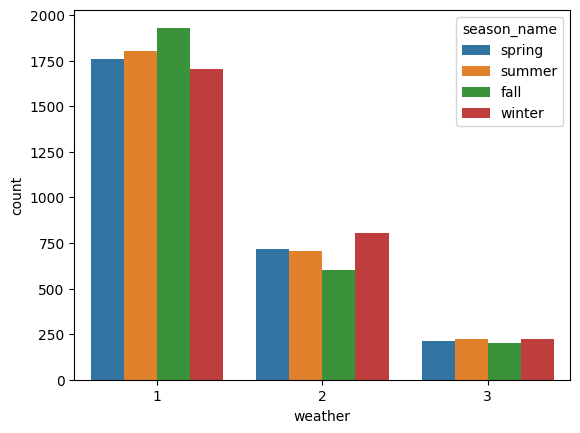

In [ ]:
sns.countplot(data=df, x=df["weather"],hue=df["season_name"])

<Axes: xlabel='season_name', ylabel='count'>

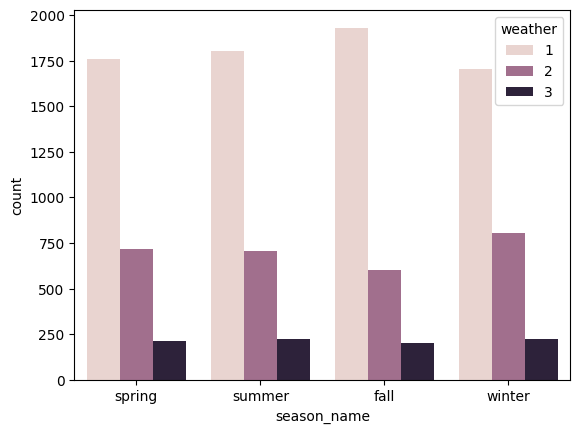

In [ ]:
sns.countplot(data=df, x=df["season_name"],hue=df["weather"])

In [ ]:
# H0: There is no significant association between season and weather conditions
# H1: There is a significant association between season and weather conditions

# Test: Chi Square test for independence

# import libraries
from scipy.stats import chi2_contingency

# Create a contingency table
table = pd.crosstab(df["season_name"],df["weather"])

# Perform the chisquare test
stat, p, dof, expected = chi2_contingency(table)
print(f"Chi-square statistic: {stat}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Interpretation
if p > 0.05:
 print('There is no significant association between season and weather conditions')
else:
 print('There is a significant association between season and weather conditions')

Chi-square statistic: 46.10145731073249
p-value: 2.8260014509929343e-08
Degrees of freedom: 6
Expected frequencies:
[[1805.76352779  711.55920992  215.67726229]
 [1774.04869086  699.06201194  211.8892972 ]
 [1805.76352779  711.55920992  215.67726229]
 [1806.42425356  711.81956821  215.75617823]]
There is a significant association between season and weather conditions


#Insights

* There is a significant association between season and weather conditions

# Recommendations
* We can observe that in weather type 1 (1: Clear, Few clouds, partly cloudy, partly cloudy) maximum number of rented bikes are in fall season
* Weather type 2 (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)
  maximum number of rented bikes are in winter season
* There is almost similar demand for bikes in  spring and summer seasons in all weather conditions. On the other hand during fall season demand is high if weather condition 1 and during winter season maximum demand is during weather consition 2 so we can increase the stock count on these season.

* Think about using flexible pricing tactics that adapt to weather conditions. For example, altering rental fees on days with extreme weather to maximize earnings.

* Since statistically bike rentals on weekdays are GREATER than rides on weekends, adjusting bike deployment is important. This ensures a balanced distribution and better availability for users on weekdays.

* Advertise the bikes differently in each season. For example, highlight summer promotions in June, July, and August when more people want to ride bikes.